## <center><h1>**Neural Network**</h1>
<center> </br>Astrid Jourdan<br/>

In [1]:
# Library importations

import math
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-15 15:19:25.766375: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-15 15:19:25.795691: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 15:19:25.795719: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 15:19:25.795738: E tensorflow/c

<h2>Data pre-processing</h2>


In [3]:
# File import
dataset = pnd.read_csv("Landsat.txt", delimiter=" ")

x = dataset.drop(columns=['SoilType']) # input variables
y = dataset['SoilType'] # Target variable

n = x.shape[0] # number of observations
d = x.shape[1] #number of input variables

In [4]:
# Encoded Target variable
y_cat = pnd.get_dummies(y)
p = y_cat.shape[1] #number of classes

y_cat.head()

,cotton crop,damp grey soil,grey soil,red soil,vegetation stubble,very damp grey soil
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False
5,False,False,True,False,False,False


In [5]:
# Training, validation and test sets
# Fisrt split 70% - 30%
xTrain, xRest, yTrain, yRest = train_test_split(x, y_cat, train_size = 0.7)
# Second split 15% - 15%
xVal, xTest, yVal, yTest = train_test_split(xRest, yRest, test_size = 0.5)
# Scaling
scaler = StandardScaler()
xTrain_scaled = scaler.fit(xTrain)
xTrain_scaled = scaler.transform(xTrain)
xVal_scaled = scaler.transform(xVal)
xTest_scaled = scaler.transform(xTest)


<h2>Model architecture</h2>


There are different ways to create a model with Keras. The Sequential model is appropriate to build simple neural network models.
The first step is to define the architecture of the model.


> model = keras.Sequential(<br/>
    [<br/>
        layers.Input(shape=(d,)), *# where d is the number of input variables*<br/>
        layers.Dense(2, activation="tanh", name="layer1"),<br/>
        layers.Dense(3, activation="sigmoid", name="layer2"),<br/>
        ... ,<br/>
        layers.Dense(p,activation="softmax") *# where p is the number of classes*<br/>
    ]<br/>
)<br/>

Each layer is defined by the number of neurons and the activation function ([List of activation functions](https://keras.io/api/layers/activations/)).

We build a neural network with a single hidden layer.

In [9]:
modele = keras.Sequential([
layers.Input(shape=(d,)),
layers.Dense(20, activation = 'sigmoid'),
layers.Dense(p,activation='softmax')
])

modele.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                740       
                                                                 
 dense_7 (Dense)             (None, 6)                 126       
                                                                 
Total params: 866 (3.38 KB)
Trainable params: 866 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h2>Optimization process</h2>
The optimization process is defined by:

*   the optimization method ([List of methods](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers))
*   the loss function ([List of loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses))
*   the metric to compute the error ([List of metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics))

Herafater, we use a Stochastic Gradient Descend with the cross entropy loss function.

In [10]:
# Optimization process (loss function, optimization method, error metric)
modele.compile(
  optimizer='sgd',
  loss='categorical_crossentropy',
  metrics=['categorical_accuracy'])

modele.summary()

<h2>Training the model</h2>
For the training process, we need to define:


*   the number of epochs
*   the number of observations used at each iteration of the backpropagation algorithm


In [ ]:
training = modele.fit (xTrain_scaled, yTrain, epochs = 10,batch_size=5, validation_data = (xVal_scaled,yVal))

Epoch 1/10
901/901 [==============================] - 2s 2ms/step - loss: 0.3081 - categorical_accuracy: 0.8808 - val_loss: 0.3279 - val_categorical_accuracy: 0.8674
Epoch 2/10
901/901 [==============================] - 1s 2ms/step - loss: 0.3066 - categorical_accuracy: 0.8839 - val_loss: 0.3251 - val_categorical_accuracy: 0.8746
Epoch 3/10
901/901 [==============================] - 2s 2ms/step - loss: 0.3057 - categorical_accuracy: 0.8821 - val_loss: 0.3235 - val_categorical_accuracy: 0.8694
Epoch 4/10
901/901 [==============================] - 2s 2ms/step - loss: 0.3050 - categorical_accuracy: 0.8852 - val_loss: 0.3226 - val_categorical_accuracy: 0.8746
Epoch 5/10
901/901 [==============================] - 2s 2ms/step - loss: 0.3036 - categorical_accuracy: 0.8848 - val_loss: 0.3235 - val_categorical_accuracy: 0.8725
Epoch 6/10
901/901 [==============================] - 2s 2ms/step - loss: 0.3024 - categorical_accuracy: 0.8854 - val_loss: 0.3213 - val_categorical_accuracy: 0.8663
Epoc

The algorithm is stochastic. If we run the learning procedure several times (with the same data set), we do not obtain the same results. The result depends on the initialization of the network weights.
</br></br>

*history* returns the values of the loss function and the metrics for the training and test sets at each epoch. It is then possible to plot the progress of the fitting error function and the test error function.

In [ ]:
histo = pnd.DataFrame(training.history) # transform the array into a dataframe
histo.head()

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.320404,0.874778,0.337452,0.865285
1,0.319081,0.876332,0.338740,0.866321
2,0.317383,0.876332,0.336555,0.864249
3,0.316808,0.877442,0.332900,0.864249
4,0.314814,0.877220,0.335414,0.865285


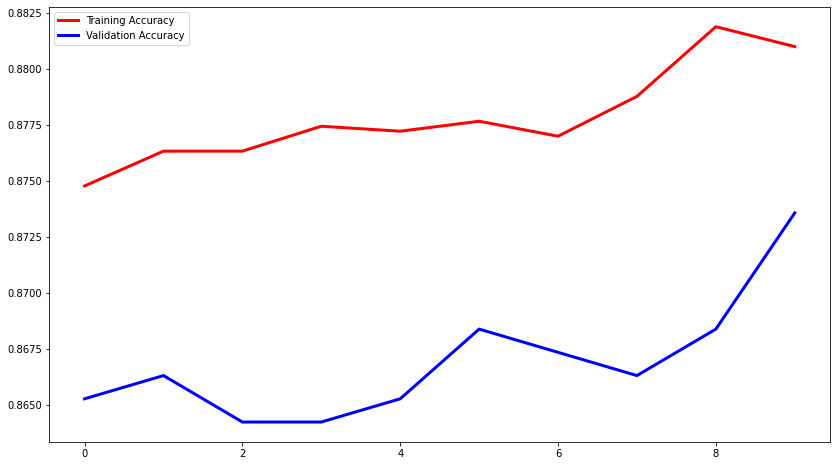

In [ ]:
histo['Epoch'] = training.epoch # add a column with the epoch number
figure, axe = plt.subplots(figsize = (14,8))
num_epoch = histo.shape[0]
axe.plot(np.arange(0, num_epoch), histo["categorical_accuracy"],label = "Training Accuracy", lw = 3, color = 'red')
axe.plot(np.arange(0, num_epoch), histo["val_categorical_accuracy"],label = "Validation Accuracy", lw = 3, color = 'blue')
axe.legend ()
plt.show()


<h2>Prediction</h2>
The <i>predict</i> function returns a vector with the probability of each class. </br></br>
The predicted class is the one with the highest probability. We use the <i>argmax</i> function (numpy) to find the column index of the maximum value. The argmax function is defined for arrays and not dataframes. We convert a dataframe into an array with the function <i>to_numpy</i>.



In [ ]:
pred_proba = modele.predict(xVal_scaled)
print("Probabilities for each class \n",pred_proba[0:3]) # display the first 3 rows of the xVal prediction
print("\n")

# The predicted class is the
yVal_pred = np.argmax(pred_proba,axis=1)
print("Predicted class \n",yVal_pred[0:9])
print("\n")

# The true class is the column number in yVal_cat with the maximum probability
yVal_true = np.argmax(yVal.to_numpy(),axis=1)  # .to_numpy()  convert the dataframe into an array
print("True class \n",yVal_true[0:9])


Probabilities for each class 
 [[4.1388610e-04 4.9816445e-02 9.2647052e-01 2.7993025e-04 2.5871657e-03
  2.0431997e-02]
 [1.7114889e-02 1.8205578e-03 2.3863059e-03 8.3592296e-01 1.4271931e-01
  3.5996953e-05]
 [9.8589480e-01 3.4665766e-07 5.2526893e-06 1.3958638e-04 1.3956523e-02
  3.4489592e-06]]


Predicted class 
 [2 3 0 5 3 3 5 5 3]


True class 
 [2 4 0 1 3 3 5 2 3]


In [ ]:
# Global accuracy
print("Test Accuracy : ", accuracy_score(yVal_true,yVal_pred)*100)

# Confusion matrix
ConfMat=confusion_matrix(yVal_true,yVal_pred)
print("\n Confusion matrix:")
print(ConfMat)

# Accuracy per class
Acc_Class=100*ConfMat.diagonal()/np.sum(ConfMat,axis=0)
#Acc_Class=pnd.DataFrame(Acc_Class, index=["setosa", "versicolor","virginica"],columns=["Accuracy"])
print("\n Accuracy per class:")
print(Acc_Class)

Test Accuracy :  87.35751295336787

 Confusion matrix:
[[105   0   0   0   3   0]
 [  1  43  14   0   0  21]
 [  0  13 188   3   0   4]
 [  0   0   3 230   2   0]
 [  2   3   1  10  92  11]
 [  0  18   5   0   8 185]]

 Accuracy per class:
[97.22222222 55.84415584 89.09952607 94.65020576 87.61904762 83.71040724]


<center>
<h1>EXERCICE</h1>
</center>

The dataset <i>letter-recognition.data</i> contains character image features and the objective is to identify the letter (from A to Z).<br/>

<center>
<div>
<img src="https://drive.google.com/uc?id=1Qg7JS0fRYMQD87vKS0QR4u8PWHO9Fofz" width="500"/>
</div>
</center><br/>

A description of the dataset and the input variables is given on the web site [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Letter+Recognition)
<br/>


<ol>
<li>Dataset importation. <br/>
How many images are in the dataset?<br/>
What is the target variable name? Verify its distribution.<br/>
How many variables are in the dataset? What is their type? <br/>
</li>
<li>Data preprocessing.<br/>
Binarize the target variable.<br/>
Split the dataset into training, validation and test sets.<br/>
Scale the numerical variables.<br/>
<li>Neural network model<br/>
Build the architecture of the neural network.<br/>
Define the optimization process.<br/>
Train the model with the training dataset.<br/>
Analyse the results (Accuracy, confusion matrix,...).<br/>
<ol/>

In [ ]:
## QUESTION 1
##
## Your code here
##

In [ ]:
## QUESTION 2
##
## Your code here
##


In [ ]:
## QUESTION 3
##
## Your code here
##
